# Hypothyroid Classification Challenge


## a) Specifying the Data Analytic Question


Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## b) Defining the Metric for Success
i. To create a prediction model using decision trees

ii. To create a prediction model using support vector machine

## c) Understanding the context
Also called underactive thyroid disease, hypothyroidism is a disease whereby the thyroid gland does not produce adequate thyroid hormone. The thyroid hormone fuctions to controlthe body's metabolism while also dictating the ody's temperature, heartbeat, the the rate at which calories are burned.Some of the common symptoms associated with the disease include poor ability to tolerate cold, a feeling of tiredness, constipation, slow heart rate, depression, and weight gain. During pregnancy, hypothyroid has been identified asincreasin the liklihood of a miscarriage while it could also lead to infertility. 

According to research, the most common cause of hypothyroidism is iodine deficiency and while the diagnosis of the disease is often through laboratory tests which examine different hormone levels in the blood. Some of the tests taken include thyroid stimulating hormone levels, thyroid releasing hormone while additional tests may be done based on the patient's individual profile. For this particlar study, the information on the patients was collected on their hypothyroid status, age, gender, thyroxine levels and medication, previous surgery, illness, presence of a tumor, goitre along with measures of TSH, T3, TT4, T4U, FTI, and TBG measurements.


## d) Recording the Experimental Design
For this experiemnt, I will:
*   Load the data set
*   Preview the data
*   Prepare the data
*   Perform Exploratory Data Analysis i.e Univariate, Bivariate and Multivariate analysis 
*   Train the models
*   Evaluate the models
*   Drawing conclusions and recommendations


## 1. Reading the Data

In [ ]:
# Import primary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Read the data set
hypoT = pd.read_csv('hypothyroid.csv')
# Preview first 5 rows
hypoT.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
# Preview last 5 rows
hypoT.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
# Check the data set shape
rows, columns=hypoT.shape[0], hypoT.shape[1]
print('This data set has ' + str(rows)+ ' rows, and ' + str(columns)+ ' columns.')

This data set has 3163 rows, and 26 columns.


In [ ]:
# Check data types
hypoT.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

According to this output, all columns have an 'object' data type. To work with the columns effectively, I will change some of the data types.

## 2. Data Relevance
The data set seemse relevant to solve the pregancy classification problem since it contains information about previous patients including their hypotyroid status, their age, pregnancy status, along with measures of TSH and T3 all of which are very relevant in identifying problematic cases. 

## 3. External data set validation
To validate the data set, I did an internet search to check some of the key factors that determine an individual's hypothyroid status. Based on my research, most of the variables that were observed had a meaningful impact on predicting an individual's status. More information about the disease can be found [here.](https://en.wikipedia.org/wiki/Hypothyroidism#Causes). I also examined the ranges of the different hormone levels which I used to interpret the outliers in the dataset.

## 4. Tidying the data set

In [ ]:
# Change column data types
pd.set_option('display.max_columns', None)
hypoT.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?


The columns with integers and floats have some 'question marks' where the data was missing so I will remove these before converting to float data type.

In [ ]:
# Replace missing data with 'nan'
hypoT.replace(to_replace='?', value= np.nan, inplace=True)
hypoT.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.10,y,27,y,1.19,y,23,n,NaN
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.70,y,1.30,y,54,y,0.86,y,63,n,NaN
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.90,y,34,y,1.05,y,32,n,NaN
8,hypothyroid,20,F,f,f,f,f,t,f,f,f,f,f,f,y,92,n,NaN,y,39,y,1.21,y,32,n,NaN
9,hypothyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,48,n,NaN,y,7.60,y,1.02,y,7.50,n,NaN


In [ ]:
# Change columns data types
hypoT = hypoT.astype({'age': 'float64', 'TSH': 'float64', 'T3': 'float64',
                     'TT4': 'float64', 'T4U': 'float64', 'FTI': 'float64',
                     'TBG': 'float64'})
hypoT.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [ ]:
# Check for null values
hypoT.isna().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

The data set has multiple missing data in the age and sex columns, while several test measures were not taken in certain patients.

In [ ]:
# Replace null values in gender with unknown
hypoT.sex = hypoT.sex.fillna('U')
hypoT.sex.unique()

array(['M', 'F', 'U'], dtype=object)

I filled the blanks in the sex column with 'Unknown' which I denoted using 'U'.

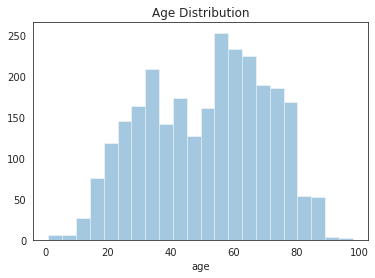

In [ ]:
# check distribution
sns.distplot(hypoT['age'], kde=False)
plt.title('Age Distribution')
plt.show()

In [ ]:
# Check validity of null values in columns
len(hypoT[(hypoT['status'] == 'hypothyroid') & (hypoT['age'].isnull())])/ len(hypoT[hypoT['status'] == 'hypothyroid']) * 100

9.933774834437086

From the distribution plots, filling the null values in 'age' with the median or mode could affect the results since the samples range between 1 and 98 years. Since we are interested in predicting the incidence of hypothroidism, only 9% of the positive cases have no age so we can safely drop the values.

In [ ]:
# Drop rows with null values in  age 
hypoT = hypoT.drop(hypoT[hypoT['age'].isnull()].index)
hypoT.isnull().sum()

status                          0
age                             0
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           426
T3_measured                     0
T3                            636
TT4_measured                    0
TT4                           220
T4U_measured                    0
T4U                           219
FTI_measured                    0
FTI                           218
TBG_measured                    0
TBG                          2489
dtype: int64

In [ ]:
# Check accuracy of null values in other numeric columns
hypoT[hypoT['TSH'].isnull()]

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
55,hypothyroid,41.0,F,f,f,f,f,f,f,f,f,f,f,f,n,NaN,n,NaN,y,44.0,y,0.90,y,49.0,n,NaN
152,negative,72.0,M,f,f,f,f,f,f,f,f,f,f,f,n,NaN,y,1.0,y,83.0,y,0.95,y,87.0,n,NaN
166,negative,60.0,M,t,f,f,f,f,f,f,f,f,f,f,n,NaN,n,NaN,n,NaN,n,NaN,n,NaN,y,0.0
170,negative,22.0,F,f,f,f,f,f,t,f,f,f,f,f,n,NaN,y,1.7,y,82.0,y,0.72,y,114.0,n,NaN
184,negative,59.0,F,f,f,f,f,f,f,f,f,f,f,f,n,NaN,y,1.5,y,97.0,y,0.91,y,107.0,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,negative,40.0,F,f,f,f,f,f,t,f,f,f,f,f,n,NaN,n,NaN,n,NaN,n,NaN,n,NaN,y,29.0
3135,negative,23.0,F,t,f,f,f,t,f,f,f,f,f,f,n,NaN,n,NaN,y,171.0,y,1.29,y,133.0,n,NaN
3136,negative,28.0,F,f,f,t,f,f,f,f,f,f,f,f,n,NaN,n,NaN,n,NaN,n,NaN,n,NaN,y,39.0
3150,negative,15.0,M,f,f,f,f,f,t,f,f,f,f,f,n,NaN,n,NaN,y,188.0,y,0.73,y,258.0,n,NaN


For the section on test measures, the samples with null values were where no measure was taken and this was reflected in the data.

In [ ]:
# check minmum values
numeric = ['TSH','T3','TT4','T4U','FTI','TBG']
for col in numeric:
  print('Minimum value for ' + col + ' is ' + str(hypoT[col].min()))

Minimum value for TSH is 0.0
Minimum value for T3 is 0.05
Minimum value for TT4 is 2.0
Minimum value for T4U is 0.0
Minimum value for FTI is 0.0
Minimum value for TBG is 0.0


With regards to the other numerical variables, it is also important to note that the missinness of data arises from a lack of measurement of the respective variable. Since none of the values is negative judging by their minimum values, I will assign all missing values a value of '-1'.

In [ ]:
# Replace missing values with '-1'
for col in numeric:
  hypoT[col] = hypoT[col].fillna(-1)

hypoT.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

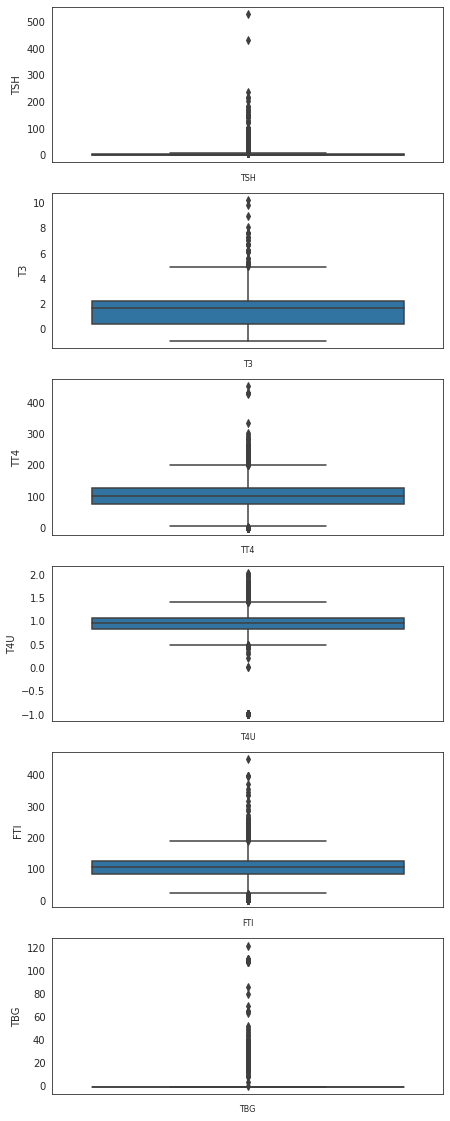

In [ ]:
# Check for outliers
fig, ax = plt.subplots(len(numeric), figsize=(7, 20))
for i, col_val in enumerate(numeric):
    sns.boxplot(y=hypoT[col_val], ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

As evidenced by the boxplots, all the numeric variables have outliers that need to be removed. however, since I will be applying different algorithms, I wil deal with outliers at a later stage.

In [ ]:
# Make a copy for modelling
hypoT_copy = hypoT.copy()
hypoT_dummies = pd.get_dummies(hypoT_copy, drop_first=True)
hypoT_dummies.head()

,age,TSH,T3,TT4,T4U,FTI,TBG,status_negative,sex_M,sex_U,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,thyroid_surgery_t,query_hypothyroid_t,query_hyperthyroid_t,pregnant_t,sick_t,tumor_t,lithium_t,goitre_t,TSH_measured_y,T3_measured_y,TT4_measured_y,T4U_measured_y,FTI_measured_y,TBG_measured_y
0,72.0,30.0,0.6,15.0,1.48,10.0,-1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
1,15.0,145.0,1.7,19.0,1.13,17.0,-1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
2,24.0,0.0,0.2,4.0,1.00,0.0,-1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3,24.0,430.0,0.4,6.0,1.04,6.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
4,77.0,7.3,1.2,57.0,1.28,44.0,-1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0


## 5. Performing Exploratory Data Analysis

### i. Univariate Analysis

In [ ]:
# a statistical description of the numeric columns
hypoT.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000
mean,51.154214,4.918160,1.257968,100.285572,0.829389,102.970114,1.720685
std,19.294405,22.270705,1.526657,53.129831,0.582260,51.659315,10.597478
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,35.000000,0.000000,0.400000,76.000000,0.830000,84.000000,-1.000000
50%,54.000000,0.300000,1.600000,100.000000,0.950000,104.000000,-1.000000
75%,67.000000,1.700000,2.200000,125.000000,1.060000,126.000000,-1.000000
max,98.000000,530.000000,10.200000,450.000000,2.030000,450.000000,122.000000


This output gives a description of the number of records per variable, the mean, the standard deviation, the 25th percentile, the 75th percentile and the maximum values.

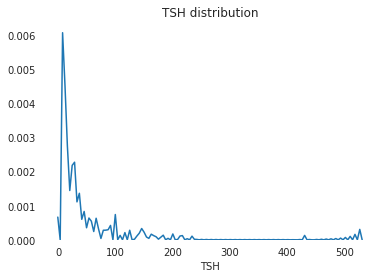

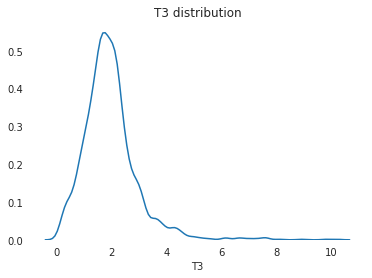

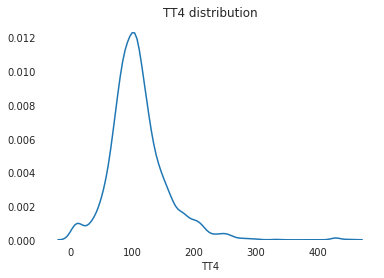

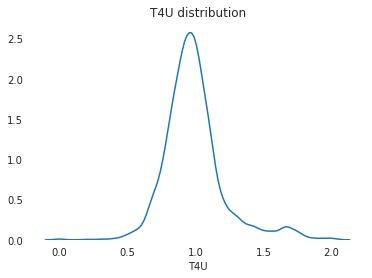

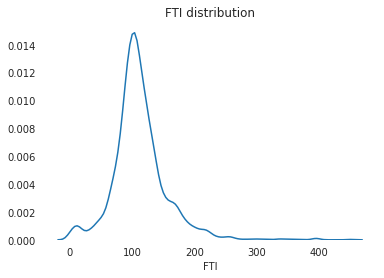

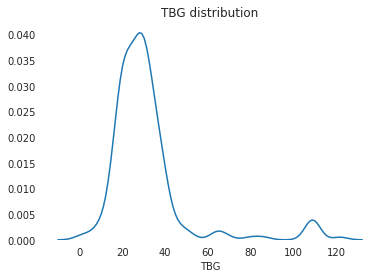

In [ ]:
# Check distribution of numeric variables
for col in numeric:
  measured = hypoT[hypoT[col] != -1]
  sns.distplot(measured[col], kde=True, hist=False)
  dist_title = col + ' distribution'
  plt.title(dist_title)
  sns.despine(left=True, bottom=True)
  plt.show()

In [ ]:
# Check kurtosis and skewness for distributions
measured = hypoT[hypoT[col] != -1]
for col in numeric:
  print('The kurtosis for ' + col + ' distribution is ' + str(measured[col].kurt()))
print('\n')
for col in numeric:
  print('The skewness for ' + col + ' distribution is ' + str(measured[col].skew()))

The kurtosis for TSH distribution is 165.46222031193065
The kurtosis for T3 distribution is 112.10497027590202
The kurtosis for TT4 distribution is 70.47122840113677
The kurtosis for T4U distribution is 18.48716914377804
The kurtosis for FTI distribution is 95.33544978520641
The kurtosis for TBG distribution is 9.167049079738074


The skewness for TSH distribution is 12.554323681210798
The skewness for T3 distribution is 10.628333035305861
The skewness for TT4 distribution is 7.883610547177194
The skewness for T4U distribution is 4.502031193926945
The skewness for FTI distribution is 9.051586459238692
The skewness for TBG distribution is 2.8615415270415


Since I had already replaced null values with '-1', I ommitted the samples whose samples were not measured from the distribution. Regarding the variable distribution patterns, almost all variables were heavily skewed toward the right, and based on their kurtosis values, each had a relatively high peak.

In [ ]:
# Get a statistical description of categorical columns
hypoT.describe(include='O')

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
count,2717,2717,2717,2717,2717,2717,2717,2717,2717,2717,2717,2717,2717,2717,2717,2717,2717,2717,2717
unique,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,negative,F,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n
freq,2581,1909,2284,2671,2681,2627,2503,2493,2658,2629,2680,2715,2625,2291,2081,2497,2498,2499,2489


This description indicates the most frequent category along with its frequency. Out of 2717 people sampled, 2581 tested negative for hypothroidism. The number of females sampled were 1909 out of 2717 while for variable such as 'on_thyroxine', 'query_on_thyroxine', 	'on_antithyroid_medication', 'thyroid_surgery' 	'query_hypothyroid', 	'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', and 'goitre', more patients recorded negative results compard to those that had positive results. Additionally, the 'TSH', 'T3', 'TT4', 'T4U', and 'FTI' measurements were taken for most of the individuals who were sampled aside from the 'TBG' where less measurements were taken. We cn visualize this information to have a better understanding.

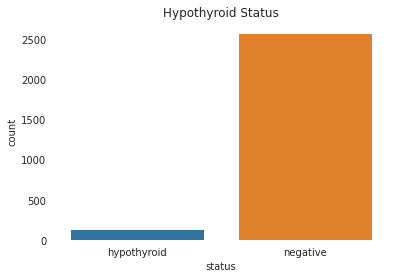

In [ ]:
# Examine the target categorical variable
sns.countplot(x='status', data=hypoT)
plt.title('Hypothyroid Status')
sns.despine(left=True, bottom=True, trim=True)
plt.show()

A majority of the patients that were sampled did not have hypothyroidism. 

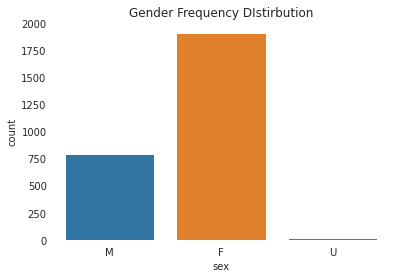

In [ ]:
# Examine the gender
sns.countplot(x='sex', data=hypoT)
plt.title('Gender Frequency DIstirbution')
sns.despine(left=True, bottom=True, trim=True)
plt.show()

There study involved more females than males overall.

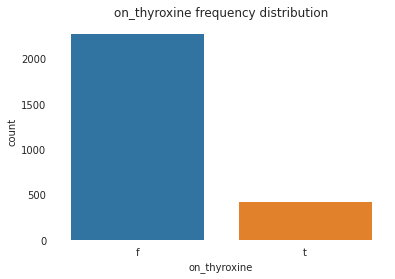

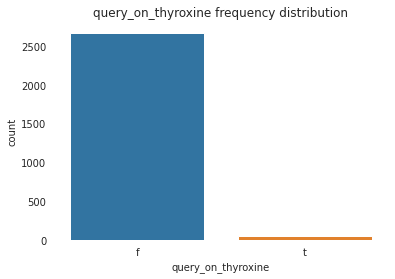

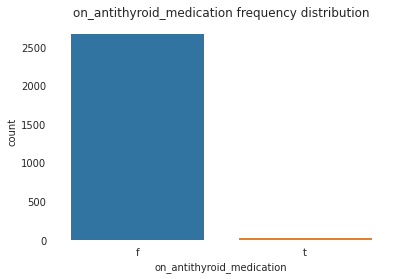

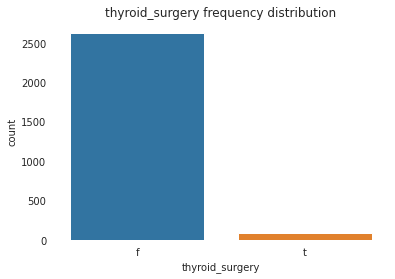

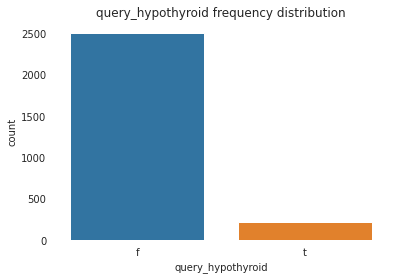

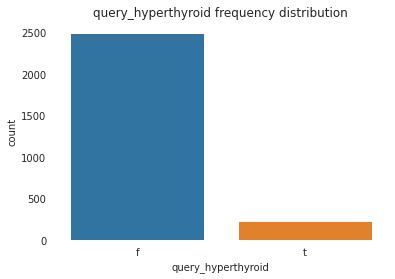

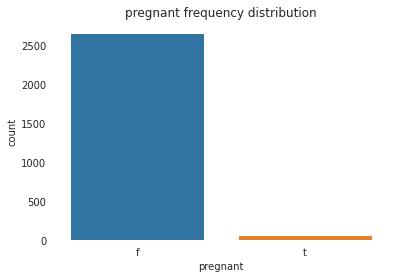

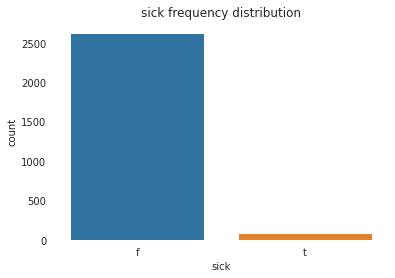

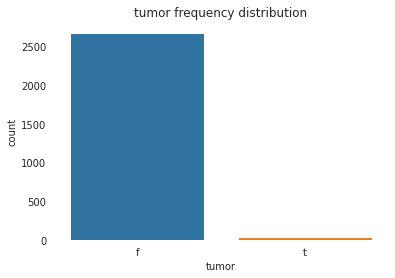

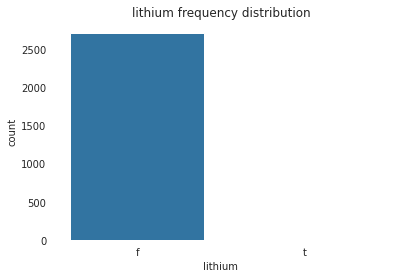

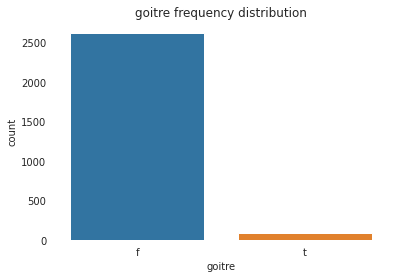

In [ ]:
# Examine the categorical variables that were tested
categorical = ['on_thyroxine', 'query_on_thyroxine',
               'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
               'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']
for cat in categorical:
  sns.countplot(x=cat, data=hypoT)
  title = cat + ' frequency distribution'
  plt.title(title)
  sns.despine(left=True, bottom=True, trim=True)
  plt.show()

SInce most of the patients were negative, it is not surpising that most of them reported false on all the test measures that were taken.

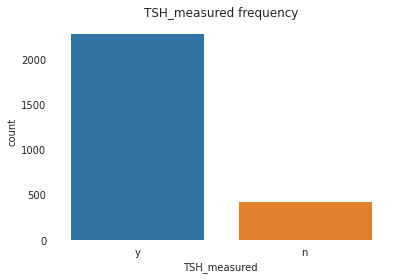

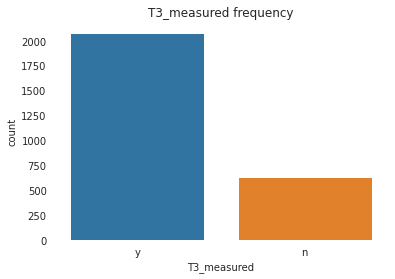

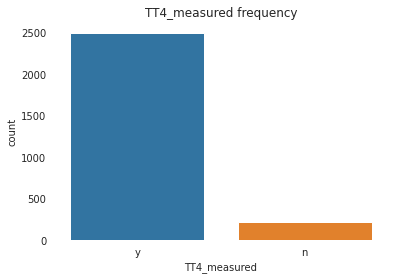

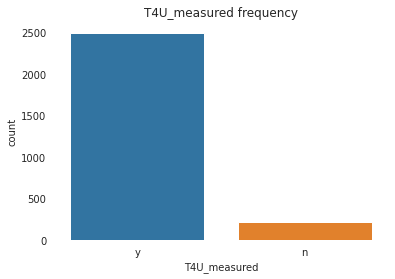

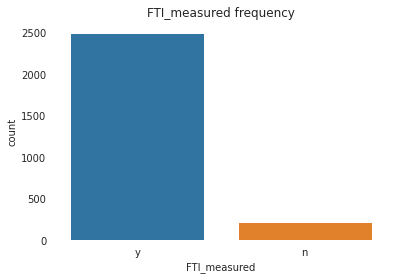

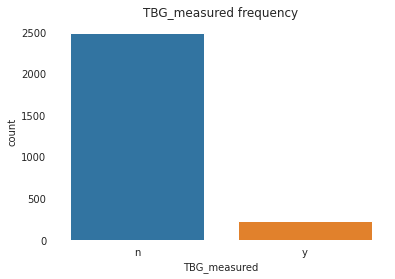

In [ ]:
# Examine the test measure taken
measures = ['TSH_measured', 'T3_measured', 'TT4_measured',
               'T4U_measured', 'FTI_measured', 'TBG_measured']

for measure in measures:
  sns.countplot(x=measure, data=hypoT)
  title = measure + ' frequency'
  plt.title(title)
  sns.despine(left=True, bottom=True, trim=True)
  plt.show()

Out of the all the patients that were sampled, it is also unsuprising that they had most of the patients that were sampled had their meaures taken.

### ii. Bivariate Analysis

In [ ]:
# Examine relationship between target and variables
# Select all rows where hypothyroid was  evident
hypothyroid = hypoT.groupby('status').get_group('hypothyroid')
non_hypothyroid = hypoT.groupby('status').get_group('negative')

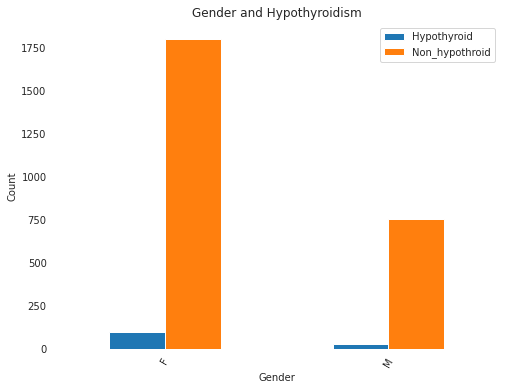

In [ ]:
# Examine Hypothyroidism and gender
gender = pd.DataFrame(hypothyroid['sex'].value_counts())
gender['Non_hypothyroid'] = non_hypothyroid['sex'].value_counts()
gender.columns = ['Hypothyroid', 'Non_hypothroid']

gender.plot(kind='bar', figsize=(8,6), stacked=False)
plt.xticks(rotation=60)
plt.title('Gender and Hypothyroidism')
plt.xlabel('Gender')
plt.ylabel('Count')
sns.despine(left=True, bottom=True)
plt.show()

The number of females sampled was more than that of males but they also recorded higher rates of hypothyroidism compared to men

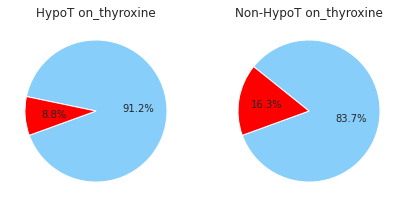

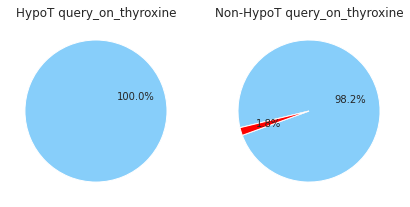

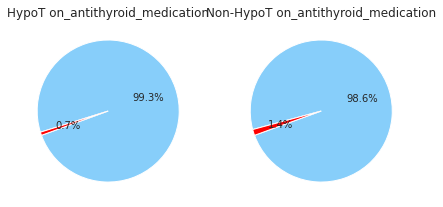

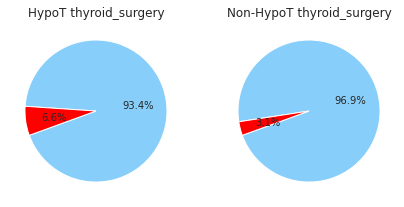

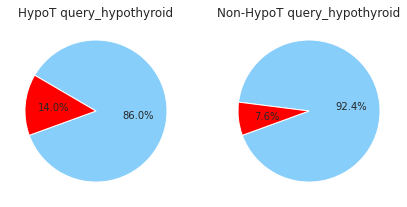

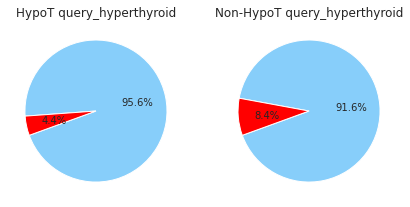

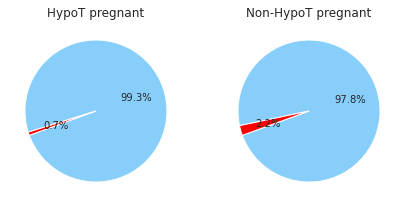

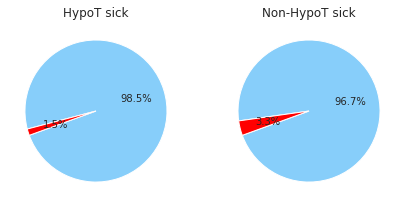

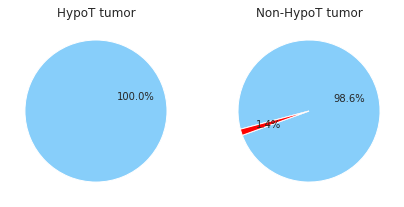

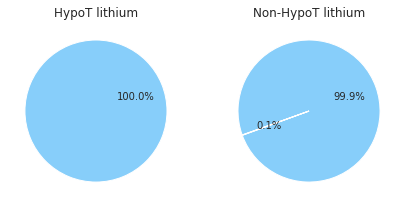

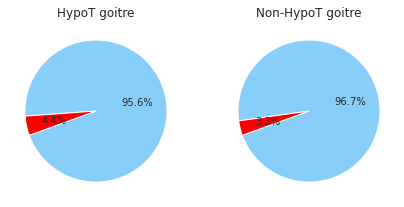

In [ ]:
# comparing incidence of hypothyroidism and other variable factors that were tested
test_variables = ['on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 
                  'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']
for var in test_variables:
  fig, [ax1, ax2] = plt.subplots(1,2, figsize=(7,7,))
  title1 ='HypoT ' + var
  title2 ='Non-HypoT ' + var
  ax1.pie(hypothyroid[var].value_counts(), autopct='%1.1f%%', shadow=False, startangle=200, colors=['lightskyblue', 'red'])
  ax2.pie(non_hypothyroid[var].value_counts(), autopct='%1.1f%%', shadow=False, startangle=200, colors=['lightskyblue', 'red'], )
  ax1.title.set_text(title1)
  ax2.title.set_text(title2)
  plt.show()

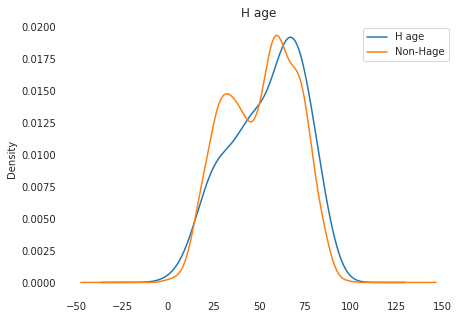

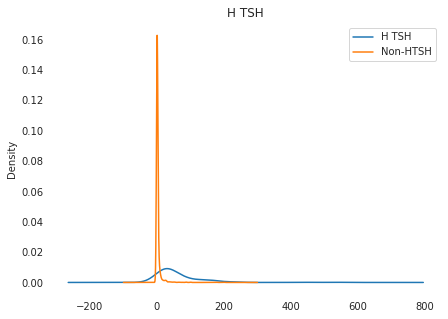

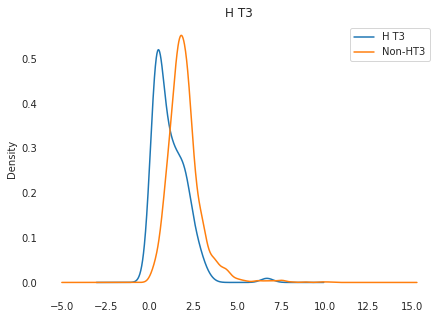

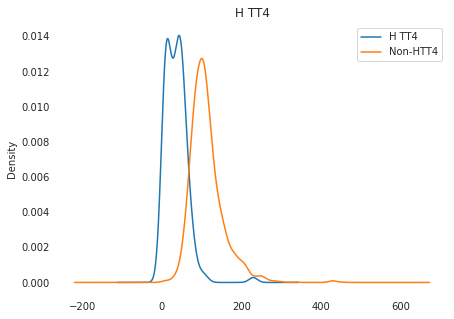

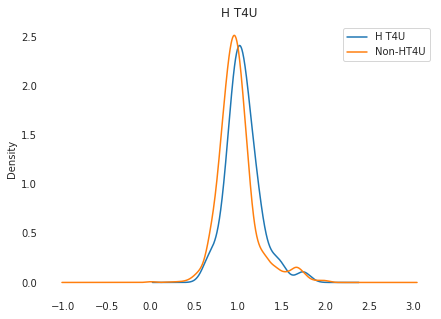

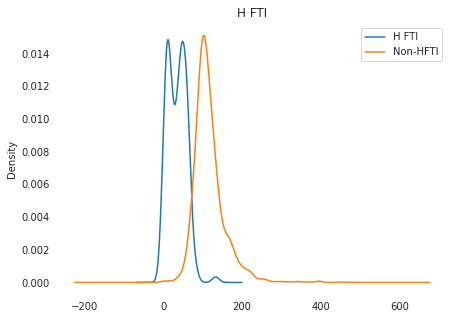

In [ ]:
# Plot histograms for hypothyroid patients
numeric = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
for col in numeric:
  fig = plt.figure(figsize=(7,5))
  measured = hypothyroid[hypothyroid[col] != -1]
  measured2 = non_hypothyroid[non_hypothyroid[col] != -1]
  lbl = 'H ' + col
  measured[col].plot.kde(label=lbl, legend=True)
  lbl2 = 'Non-H' + col
  measured2[col].plot.kde(label=lbl2, legend=True)
  ttl = lbl + lbl2
  plt.title(lbl)
  sns.despine(left=True, bottom=True)
  plt.show()

### iii. Multivariate analysis

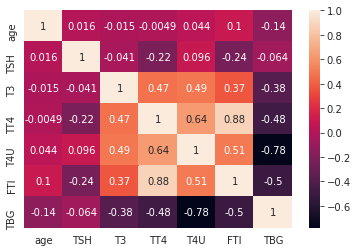

In [ ]:
# Check relationship between target and numeric test measures taken
numeric = hypoT[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']]
sns.heatmap(numeric.corr(), annot=True)
plt.show()

## 6. Modeling

### Base model
Before I start modelling, I will split the data set into training and validation sets.

In [ ]:
# Split the data set into training and validation data
from sklearn.model_selection import train_test_split

X = hypoT_dummies.drop('status_negative', 1)
y = hypoT_dummies['status_negative']

X_t, X_val, y_t, y_val = train_test_split(X, y, test_size=0.1, random_state=3)

For my base model, I made the assumption that none of the patients tested positive for a hypothyroid. This was an effective strategy considering the more people test negative compared to those who test positive.

In [ ]:
# Split the data set into train and test data
from sklearn.model_selection import train_test_split

# Assign the target and features
X_t = hypoT_dummies.drop('status_negative', 1)
y_t = hypoT_dummies['status_negative']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

Accuracy 0.9546568627450981


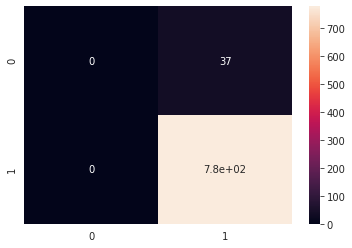

In [ ]:
# Making predictions with base model
y_base = []
for i in range(X_test.shape[0]):
  pred = 1 # I have assigned both 0 and 1 equal weights
  y_base.append(pred)

#comparing actual and predicted values and checking prediction accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_base)
print('Accuracy' , accuracy_score(y_test, y_base))

sns.heatmap(cm, annot=True)
plt.show()

From the models I create, an accuracy level lower than 93.75% will be considered a poor model. 

### Random Forest Classifier

In [ ]:
# Assign the target and features
X_t = hypoT_dummies.drop('status_negative', 1)
y_t = hypoT_dummies['status_negative']

In [ ]:
# split the data set into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
# Train the model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=6, n_estimators=15, max_features=9, random_state=15)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=15, verbose=0,
                       warm_start=False)

Accuracy 0.9889705882352942


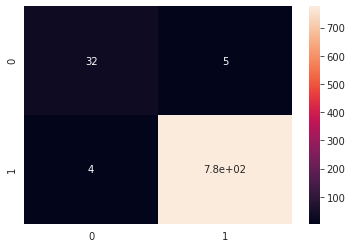

In [ ]:
# Make predictions
y_pred_rfc = rfc.predict(X_test)

#comparing actual and predicted values and checking prediction accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred_rfc)
print('Accuracy' , accuracy_score(y_test, y_pred_rfc))
sns.heatmap(cm, annot=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


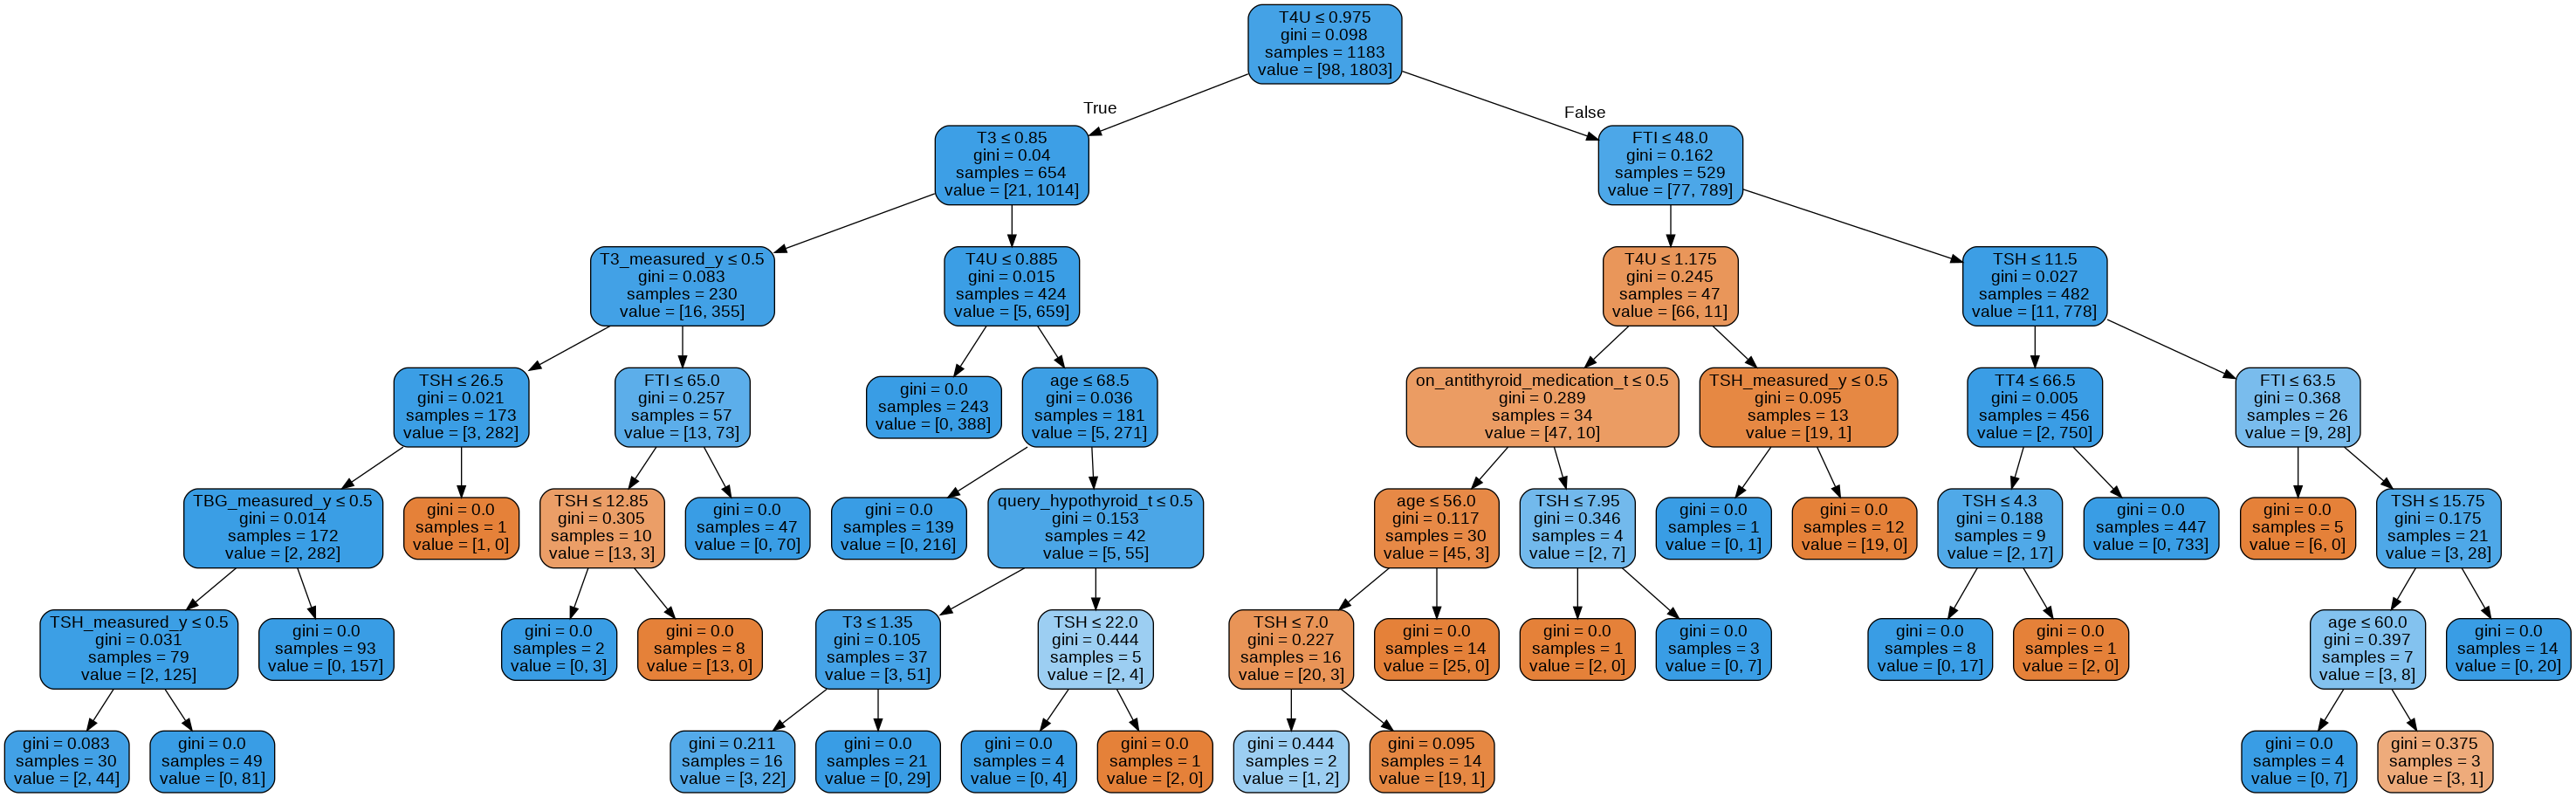

In [ ]:
# Visualize one of the decision trees
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = rfc.estimators_[10]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hyothyroid_forest.png')
Image(graph.create_png())

In [ ]:
# Create list of features and their importance
importances = list(rfc.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

# sort values
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: FTI                  Importance: 0.3
Variable: TSH                  Importance: 0.27
Variable: TT4                  Importance: 0.16
Variable: TSH_measured_y       Importance: 0.09
Variable: FTI_measured_y       Importance: 0.05
Variable: age                  Importance: 0.03
Variable: T3                   Importance: 0.03
Variable: T4U                  Importance: 0.03
Variable: sex_M                Importance: 0.01
Variable: on_antithyroid_medication_t Importance: 0.01
Variable: TBG                  Importance: 0.0
Variable: sex_U                Importance: 0.0
Variable: on_thyroxine_t       Importance: 0.0
Variable: query_on_thyroxine_t Importance: 0.0
Variable: thyroid_surgery_t    Importance: 0.0
Variable: query_hypothyroid_t  Importance: 0.0
Variable: query_hyperthyroid_t Importance: 0.0
Variable: pregnant_t           Importance: 0.0
Variable: sick_t               Importance: 0.0
Variable: tumor_t              Importance: 0.0
Variable: lithium_t            Importance: 0

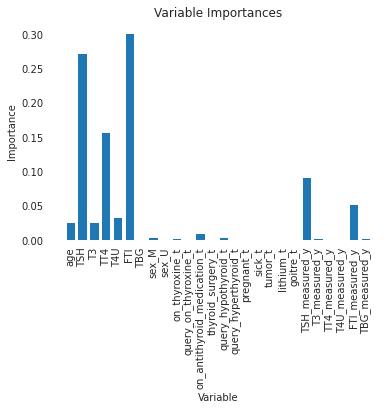

In [ ]:
# Visualize bar chart of feature importance
import matplotlib.pyplot as plt

x_values = list(range(len(importances))) # list of x locations for plotting
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, X.columns, rotation='vertical') # Tick labels for x axis
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
sns.despine(left=True, bottom=True)

### RFC Validation

Accuracy 0.9889705882352942


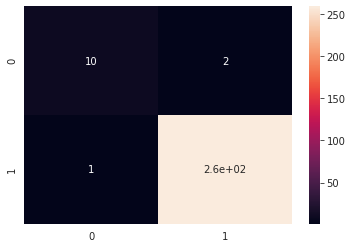

In [ ]:
y_pred_rfc_val = rfc.predict(X_val)

#comparing actual and predicted values and checking prediction accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_val, y_pred_rfc_val)
print('Accuracy' , accuracy_score(y_val, y_pred_rfc_val))
sns.heatmap(cm, annot=True)
plt.show()

### Ada Boost Classifier

In [ ]:
# Assign the target and features
X_t = hypoT_dummies.drop('status_negative', 1)
y_t = hypoT_dummies['status_negative']

# Split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
# Import and instantiate adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4), n_estimators=70, learning_rate=0.3)
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

Accuracy 0.9901960784313726


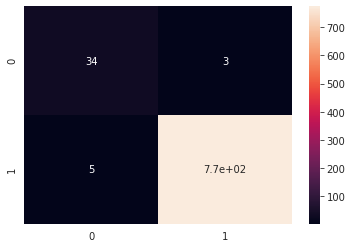

In [ ]:
# Make predictions
y_pred_abc = abc.predict(X_test)

#comparing actual and predicted values and checking prediction accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred_abc)
print('Accuracy' , accuracy_score(y_test, y_pred_abc))
sns.heatmap(cm, annot=True)
plt.show()

### ABC Validation

Accuracy 0.9926470588235294


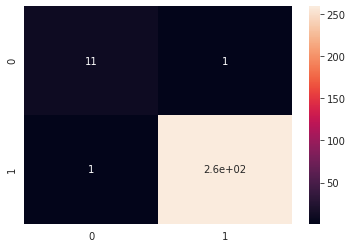

In [ ]:
y_pred_abc_val = abc.predict(X_val)

#comparing actual and predicted values and checking prediction accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_val, y_pred_abc_val)
print('Accuracy' , accuracy_score(y_val, y_pred_abc_val))
sns.heatmap(cm, annot=True)
plt.show()

### Gradient Boost Classifier

In [ ]:
# Assign the target and features
X_t = hypoT_dummies.drop('status_negative', 1)
y_t = hypoT_dummies['status_negative']

# Split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
# Import and instantiate gradient boost classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=30, learning_rate=0.4) # create an instance of classifier
gbc.fit(X_train, y_train) # train the model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=30,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Accuracy 0.9901960784313726


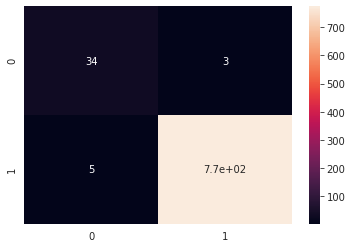

In [ ]:
# Make predictions
y_pred_gbc = gbc.predict(X_test)

#comparing actual and predicted values and checking prediction accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred_gbc)
print('Accuracy' , accuracy_score(y_test, y_pred_gbc))

sns.heatmap(cm, annot=True)
plt.show()

### Validation GBC

Accuracy 0.9926470588235294


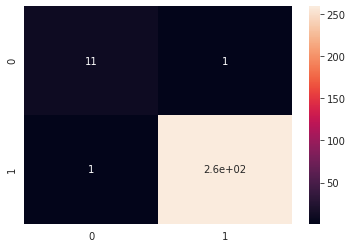

In [ ]:
y_pred_gbc_val = gbc.predict(X_val)

#comparing actual and predicted values and checking prediction accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_val, y_pred_gbc_val)
print('Accuracy' , accuracy_score(y_val, y_pred_gbc_val))
sns.heatmap(cm, annot=True)
plt.show()

### Support Vector Classifier

Decision trees are failry accurate even without adequate data cleaning procedures such as dealing with outliers unlike support vector classification models. In dealing with the outliers, I decided to separate the individuas with hypothyroidism from those without to distinguish the characteristics between groups. I removed outliers depedning on analysis per class.

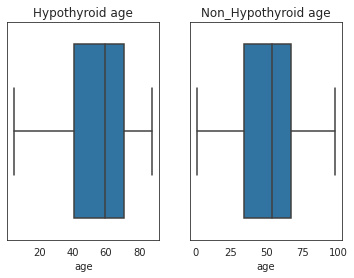

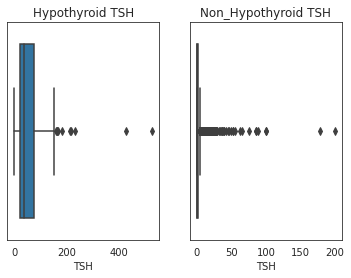

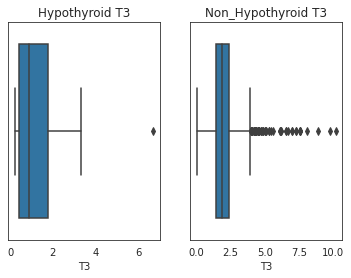

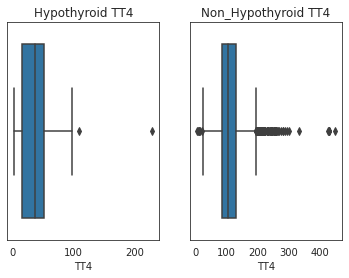

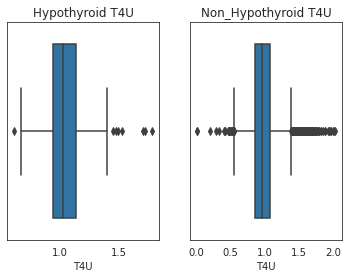

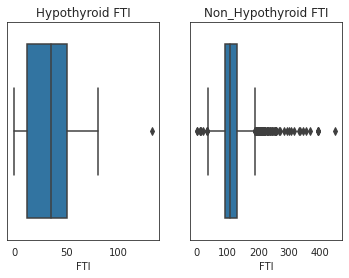

In [ ]:
hypothyroid = hypoT_dummies.groupby('status_negative').get_group(0)
non_hypothyroid = hypoT_dummies.groupby('status_negative').get_group(1)
# Check for outliers in hypothyroid and non_hypothyroid
numeric = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
for col in numeric:
  fig, [ax1, ax2] = plt.subplots(1,2)
  measured = hypothyroid[hypothyroid[col] != -1] # values with -1 represent null values
  measured2 = non_hypothyroid[non_hypothyroid[col] != -1] # values with -1 represent null values
  sns.boxplot(x=measured[col], ax=ax1)
  title1 ='Hypothyroid ' + col
  ax1.title.set_text(title1)
  sns.boxplot(x=measured2[col], ax=ax2)
  title2 ='Non_Hypothyroid ' + col
  ax2.title.set_text(title2)

I will drop the outliers that are related to individuals with hypothyroidism since that is the primary objective.

In [ ]:
# Removing positive hypothyroid outliers
print('Hypothyroid class with outliers: ', hypothyroid.shape)
q1, q3 = np.percentile(hypothyroid['TSH'], [25, 75])
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)
hypothyroid = hypothyroid.drop(hypothyroid[hypothyroid['TSH'] > upper_bound].index)

q1, q3 = np.percentile(hypothyroid['T3'], [25, 75])
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)
hypothyroid = hypothyroid.drop(hypothyroid[hypothyroid['T3'] > upper_bound].index)

q1, q3 = np.percentile(hypothyroid['TT4'], [25, 75])
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)
hypothyroid = hypothyroid.drop(hypothyroid[hypothyroid['TT4'] > upper_bound].index)

q1, q3 = np.percentile(hypothyroid['T4U'], [25, 75])
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)
hypothyroid = hypothyroid.drop(hypothyroid[hypothyroid['T4U'] > upper_bound].index)

q1, q3 = np.percentile(hypothyroid['FTI'], [25, 75])
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)
hypothyroid = hypothyroid.drop(hypothyroid[hypothyroid['FTI'] > upper_bound].index)
print('Hypothyroid class with outliers: ', hypothyroid.shape)

Hypothyroid class with outliers:  (136, 27)
Hypothyroid class with outliers:  (115, 27)


In [ ]:
# Removing negative hypothyroid outliers
print('Non-hypothyroid class with outliers: ', non_hypothyroid.shape)
q1, q3 = np.percentile(non_hypothyroid['TSH'], [25, 75])
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)
non_hypothyroid = non_hypothyroid.drop(non_hypothyroid[non_hypothyroid['TSH'] > upper_bound].index)

q1, q3 = np.percentile(non_hypothyroid['T3'], [25, 75])
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)
non_hypothyroid = non_hypothyroid.drop(non_hypothyroid[non_hypothyroid['T3'] > upper_bound].index)

q1, q3 = np.percentile(non_hypothyroid['TT4'], [25, 75])
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)
non_hypothyroid = non_hypothyroid.drop(non_hypothyroid[non_hypothyroid['TT4'] > upper_bound].index)

q1, q3 = np.percentile(non_hypothyroid['T4U'], [25, 75])
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)
non_hypothyroid = non_hypothyroid.drop(non_hypothyroid[non_hypothyroid['T4U'] > upper_bound].index)

q1, q3 = np.percentile(non_hypothyroid['FTI'], [25, 75])
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)
non_hypothyroid = non_hypothyroid.drop(non_hypothyroid[non_hypothyroid['FTI'] > upper_bound].index)
print(non_hypothyroid.shape)
print('Non-hypothyroid class with outliers: ', non_hypothyroid.shape)

Non-hypothyroid class with outliers:  (2581, 27)
(2018, 27)
Non-hypothyroid class with outliers:  (2018, 27)


In [ ]:
hypoT_dummies = pd.concat([hypothyroid, non_hypothyroid])
hypoT_dummies

,age,TSH,T3,TT4,T4U,FTI,TBG,status_negative,sex_M,sex_U,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,thyroid_surgery_t,query_hypothyroid_t,query_hyperthyroid_t,pregnant_t,sick_t,tumor_t,lithium_t,goitre_t,TSH_measured_y,T3_measured_y,TT4_measured_y,T4U_measured_y,FTI_measured_y,TBG_measured_y
1,15.0,145.0,1.7,19.0,1.13,17.0,-1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
2,24.0,0.0,0.2,4.0,1.00,0.0,-1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
4,77.0,7.3,1.2,57.0,1.28,44.0,-1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
5,85.0,138.0,1.1,27.0,1.19,23.0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0
6,64.0,7.7,1.3,54.0,0.86,63.0,-1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,69.0,2.6,1.8,126.0,1.02,124.0,-1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3159,29.0,0.8,1.8,99.0,1.01,98.0,-1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3160,77.0,1.2,0.6,71.0,0.68,104.0,-1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3161,74.0,1.3,0.1,65.0,0.48,137.0,-1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0


### Support Vector Classifications Models

### Linear Kernel

In [ ]:
# Assign the target and features
X = hypoT_dummies.drop('status_negative', 1)
y = hypoT_dummies['status_negative']

# Split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
# Train the model
from sklearn.svm import SVC,LinearSVC

svc = SVC(kernel = 'linear', gamma='auto', C=1)
svc.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Accuracy 0.9984375


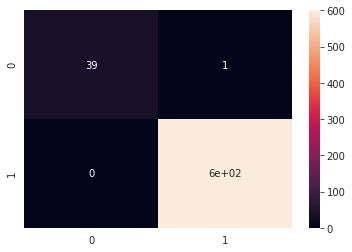

In [ ]:
# Make predictions
y_pred_svc = svc.predict(X_test)

#comparing actual and predicted values and checking prediction accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred_svc)
print('Accuracy' , accuracy_score(y_test, y_pred_svc))

sns.heatmap(cm, annot=True)
plt.show()

### SVC Linear Validation

Accuracy 0.9375


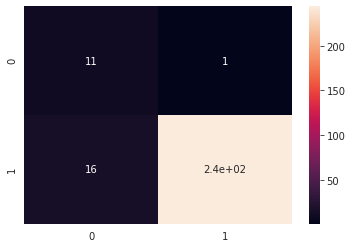

In [ ]:
y_pred_lin_val = svc.predict(X_val)

#comparing actual and predicted values and checking prediction accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_val, y_pred_lin_val)
print('Accuracy' , accuracy_score(y_val, y_pred_lin_val))
sns.heatmap(cm, annot=True)
plt.show()

### Polynomial Kernel

In [ ]:
# Assign the target and features
X = hypoT_dummies.drop('status_negative', 1)
y = hypoT_dummies['status_negative']

# Split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=2,gamma='auto',C=1)
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.9984375


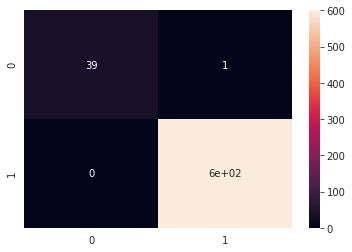

In [ ]:
# making prediction
y_pred = polyclassifier.predict(X_test)

# Model Evaluation
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)
plt.show()

### SVC Polynomial Validation

Accuracy 0.9301470588235294


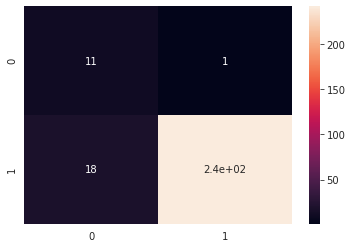

In [ ]:
y_pred_poly_val = polyclassifier.predict(X_val)

#comparing actual and predicted values and checking prediction accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_val, y_pred_poly_val)
print('Accuracy' , accuracy_score(y_val, y_pred_poly_val))
sns.heatmap(cm, annot=True)
plt.show()

### Sigmoid Kernel

In [ ]:
# Assign the target and features
X = hypoT_dummies.drop('status_negative', 1)
y = hypoT_dummies['status_negative']

# Split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid', gamma='auto')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.884375


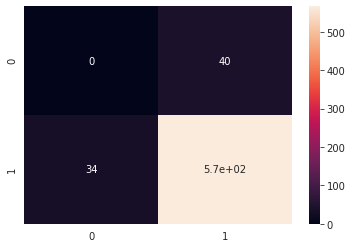

In [ ]:
# making prediction
y_pred = sigclassifier.predict(X_test)

# Model Evaluation
print( accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)
plt.show()

SVC Sigmoid Validation

Accuracy 0.8897058823529411


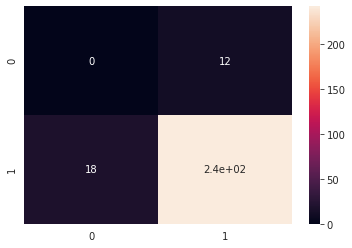

In [ ]:
y_pred_sig_val = sigclassifier.predict(X_val)

#comparing actual and predicted values and checking prediction accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_val, y_pred_sig_val)
print('Accuracy' , accuracy_score(y_val, y_pred_sig_val))
sns.heatmap(cm, annot=True)
plt.show()

### RBF Kernel

In [ ]:
# Assign the target and features
X = hypoT_dummies.drop('status_negative', 1)
y = hypoT_dummies['status_negative']

#from sklearn.decomposition import PCA # For feature reduction
#pca = PCA(n_components=3).fit(target)
#X = pca.transform(target)

# Split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
# Building the model 
rbfclassifier = SVC(kernel='rbf', C=20)
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.99375


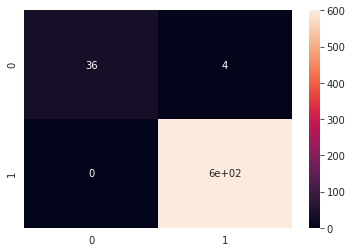

In [ ]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

# Model Evaluation
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)
plt.show()

### SVC RBF Validation

Accuracy 0.9595588235294118


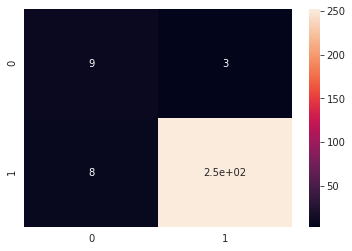

In [ ]:
y_pred_rbf_val = rbfclassifier.predict(X_val)

#comparing actual and predicted values and checking prediction accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_val, y_pred_rbf_val)
print('Accuracy' , accuracy_score(y_val, y_pred_rbf_val))
sns.heatmap(cm, annot=True)
plt.show()

## Summary

### Decision Tree Models
I created a base model that predicts all patients test negative for a hypothyroid which 
returned an accuracy score of 93.75% which is a fairly high accuracy, but it is a consequence of imbalance in the data set. 

I created three models using decision trees which included a Random Forest Classifier, an Ada Boosted Classifier, and a Gradient Boosted Classifier.The performance for the different models were as follows:

RFC training accuracy = 99.38%, validation accuracy = 99.53%

ABC training accuracy = 99.84%, validation accuracy = 99.53%

GBC training accuracy = 99.84%, validation accuracy = 99.53%

### Support Vector Machine Models
I created three models using support vector classifiers applying multiple kernels including Linear, Polynomial, Sigmoid, and RBF. The performance for the different models were as follows:

SVC Linear training accuracy = 99.84%, validation accuracy = 93.75%

SVC Polynomial training accuracy = 99.84%, validation accuracy = 93.01%

SVC Sigmoid training accuracy = 88.43%, validation accuracy = 88.97%

SVC RBF training accuracy = 99.38%, validation accuracy = 95.96%

### Model Evaluation
For each of the models I developed, the decision tree algorithms performed better with the only difference being their training performance but they all had a validation accuracy of 99.53% so I would recommend that they are used for this particular problem. It is also important to note that the RBF kernel performed best for the support vector machine models with a validation accuracy of 95.96%. 

The most important features in predicting hypothyroidism were 'FTI'(0.3), 'TSH'(0.27), 'TT4'(0.16), 'TSH_measured_y'(0.09), 'FTI_measured_y'(0.05), age(0.03), 'T3'(0.03), and 'T4U'(0.03).

## Challenging the solution

Since the decision trees performed very well on training and testing, I could increase the size of the validation data set to check if the models maintain their high performance.

With regards to the support vector machine models, I could try a grid search to improve the RBF model when tuning the hyper parameters since I did most of the tuning manually